# GA Data Science 19 (DAT19) - Class 5
## Developing Mastery of Pandas, Numpy & Bokeh
####  

Justin Breucop (with parts from Craig Sakuma)

## Lab goals

- NumPy: Entering the Matrix
- Pandas: DataFrames as Bamboo
- Bokeh: Picture-Perfect Visuals

##NumPy
As we've seen in lecture, linear algebra is the branch of mathematics describing navigation between different vector spaces. This core concept is very important as a big piece of data cleansing is converting data into various formats and certain algorithms require data to be in a specific shape.

NumPy is a package designed to be used in scientific computing, and specifically around building N-dimensional array objects.

###Creating an array

In [215]:
import numpy as np
a = np.arange(25).reshape(5,5)
# arange(n) is a function that creates a 1 row array of integers of length n 
# reshape(M,N) is a method converts a list to a matrix of size MxN
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

We can convert from lists to arrays. Note however unlike lists, elements of an array all have to be of the same datatype.

In [216]:
alist = [[ 0,  1,  2,  3,  4],[ 5,  6,  7,  8,  9],[10, 11, 12, 13, 14],[15, 16, 17, 18, 19],[20, 21, 22, 23, 24]]
type(alist)

list

In [217]:
np.array(alist)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [218]:
biga = a*10
biga

array([[  0,  10,  20,  30,  40],
       [ 50,  60,  70,  80,  90],
       [100, 110, 120, 130, 140],
       [150, 160, 170, 180, 190],
       [200, 210, 220, 230, 240]])

In [219]:
print biga.mean()
print biga.mean(0) #Average per column
biga.mean(1) #average per row
# type(biga.mean(1))

120.0
[ 100.  110.  120.  130.  140.]


array([  20.,   70.,  120.,  170.,  220.])

In [220]:
bigm = np.matrix(biga-20)
bigm

matrix([[-20, -10,   0,  10,  20],
        [ 30,  40,  50,  60,  70],
        [ 80,  90, 100, 110, 120],
        [130, 140, 150, 160, 170],
        [180, 190, 200, 210, 220]])

In [221]:
np.linalg.inv(biga-20)

array([[ -2.81474977e+13,  -1.52777778e-03,   5.62949953e+13,
         -2.22222222e-02,  -2.81474977e+13],
       [  3.51843721e+13,   2.25000000e-02,  -5.27765581e+13,
         -3.51843721e+13,   5.27765581e+13],
       [ -4.22212465e+13,   9.38249922e+13,  -7.97512434e+13,
          4.69124961e+13,  -1.87649984e+13],
       [  9.14793674e+13,  -1.87649984e+14,   9.26521798e+13,
          1.17281240e+13,  -8.20968682e+12],
       [ -5.62949953e+13,   9.38249922e+13,  -1.64193736e+13,
         -2.34562481e+13,   2.34562481e+12]])

####Slices

In [222]:
bigm = np.array(bigm)
bigm[0]

array([-20, -10,   0,  10,  20])

In [223]:
#Same thing, but demonstrating the full slice with a colon
biga[0,:]
biga

array([[  0,  10,  20,  30,  40],
       [ 50,  60,  70,  80,  90],
       [100, 110, 120, 130, 140],
       [150, 160, 170, 180, 190],
       [200, 210, 220, 230, 240]])

In [224]:
biga[:,3]

array([ 30,  80, 130, 180, 230])

Slice rules work for even more complex dimensional data

In [225]:
compa = np.arange(30).reshape(5,3,2)
compa

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]],

       [[24, 25],
        [26, 27],
        [28, 29]]])

In [226]:
# lets describe it
print compa.shape
print compa.ndim
print compa.dtype

(5, 3, 2)
3
int64


In [227]:
compa[3,:,1]

array([19, 21, 23])

In [228]:
compa[0,0,0]

0

In [229]:
compa[0,0,0] = 5.9
compa[0,0,0]

5

Numpy tries to resolve conflicting datatypes, sometimes to our dismay

In [230]:
compa = compa.astype(float)
compa[0,0,0] = 5.75
compa[0,0,0]
compa

array([[[  5.75,   1.  ],
        [  2.  ,   3.  ],
        [  4.  ,   5.  ]],

       [[  6.  ,   7.  ],
        [  8.  ,   9.  ],
        [ 10.  ,  11.  ]],

       [[ 12.  ,  13.  ],
        [ 14.  ,  15.  ],
        [ 16.  ,  17.  ]],

       [[ 18.  ,  19.  ],
        [ 20.  ,  21.  ],
        [ 22.  ,  23.  ]],

       [[ 24.  ,  25.  ],
        [ 26.  ,  27.  ],
        [ 28.  ,  29.  ]]])

####Random Numbers
Random numbers are very helpful and are necessary at times for testing data pipelines and running statistical analyses. Functions for creating random values are under numpy.random.

In [231]:
#Create a randomized array
rm = np.random.rand(5,5)
rm

array([[ 0.65687483,  0.9473479 ,  0.52641144,  0.57902062,  0.81092503],
       [ 0.35815121,  0.95361878,  0.13152906,  0.48158867,  0.92928635],
       [ 0.18080855,  0.78874543,  0.40058176,  0.64209504,  0.13342763],
       [ 0.58655203,  0.329926  ,  0.37335581,  0.48185308,  0.52934389],
       [ 0.8053307 ,  0.47734564,  0.85169691,  0.31017827,  0.0614674 ]])

In [232]:
np.random.rand()

0.18287777194551036

In [233]:
np.random.normal(0,10,50)

array([  3.84269271, -10.70806276,  18.32736892,  -3.41799429,
        -3.70993818,  -6.67013604,   9.59835255,  18.01832924,
       -13.11567408,  14.97190194,  -4.69273129, -13.85172751,
        16.61692191,  -7.26063762,  -2.0515343 ,  18.34907289,
        -5.00536371,  -4.83787451,  -8.77327718,  20.4169765 ,
        -4.34049352,  -7.49732557,   6.38050189,   9.90473095,
        -4.90917943, -10.98606827, -16.71899211,  -1.67738988,
        -7.65380438,   0.82084183,  -6.6104717 ,  -1.74555129,
         9.48518925,   7.20340527, -11.16314985,   5.7025966 ,
        -6.92717381,  -7.59669578,   6.45618586, -10.65502141,
       -10.18965434,   6.63653019,   7.32885431,  -4.9888329 ,
        -7.09639089,  -9.18041273,   6.31984635,  -3.5474848 ,
       -16.34125166,  -0.5649912 ])

In [234]:
rm.shape

(5, 5)

In [235]:
print rm.mean()
print rm.mean(0) #Average per column
print rm.mean(1) #average per row

0.533098481398
[ 0.51754346  0.69939675  0.456715    0.49894714  0.49289006]
[ 0.70411596  0.57083481  0.42913168  0.46020616  0.50120379]


In [236]:
# for a different Normal Distribution, use np.random.normal
rm = np.random.normal(5,9,(30,30))
rm

array([[  2.07362558e+01,  -8.70139581e+00,   8.91838064e+00,
         -1.04122176e+01,   1.42249349e+01,   1.04307485e+01,
          1.13807191e+01,   1.08740361e+01,  -1.24721439e+01,
          2.70917848e+01,   6.75220118e+00,   1.97377845e+00,
          1.03445345e+01,  -1.03227041e+01,   9.18476098e+00,
          1.32030478e+01,   1.10181775e+01,  -5.40704644e+00,
          7.78167113e+00,   6.57299591e+00,   2.17109528e+01,
          6.36371433e-01,   1.58917036e+01,   4.14185621e+00,
          1.05045008e+01,   1.14181874e+01,   7.19846676e+00,
          3.37364852e+00,   2.14150707e+01,   6.58289672e+00],
       [  1.16951270e+01,  -2.34860218e+01,   1.79849848e+01,
          9.99177215e+00,   8.22821164e+00,   1.17191219e+01,
          1.32965686e+01,   2.73282343e+00,  -9.31192198e+00,
          1.15398120e+01,   2.28151531e+01,   5.07915369e+00,
          8.69484152e+00,   1.04871989e+01,   1.54093457e+01,
         -9.82645037e+00,   8.01776645e+00,  -1.46318026e+00,
       

In [237]:
print rm.mean(), "which is hopefully close to the input mean"
print rm.var(), "which variance = stdev squared"
print np.median(rm)

4.893533773 which is hopefully close to the input mean
83.8098101863 which variance = stdev squared
4.65715232248


Find more distributions and random functions here: http://docs.scipy.org/doc/numpy/reference/routines.random.html

###Exercise 1
1) Create a 4x5 array of integers numbering 0 to 19.

In [238]:
np.arange(20).reshape(4,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [239]:
np.arange(20).reshape(4,5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

2) Create a 50x500 array with a mean of 20 and variance of 100. Save it to a variable called  `biggie`

In [240]:
biggie = np.random.normal(20,10,(50,500))
print biggie.shape
print biggie.mean()
print biggie.var()

(50, 500)
19.962137057
100.123081337


3) Change the mean of the array to a value within 1 of 0 and the variance within 1 of 25. Think about what the mean and the variance represent and try using various mathematical operations.

In [241]:
morph = (biggie - 20)/2
print morph.mean()
print morph.var()

-0.0189314714969
25.0307703342


##Pandas: DataFrames as Bamboo
You've already been exposed to dataframes in the previous labs so lets get into dataframes and how we can work with them.

In [242]:
import pandas as pd

data = pd.read_csv("../data/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [243]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [244]:
data[data.Age>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [245]:
data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [246]:
data[data.Age < 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S


In [247]:
data[data.Age >65]['Name']

33                    Wheadon, Mr. Edward H
96                Goldschmidt, Mr. George B
116                    Connors, Mr. Patrick
493                 Artagaveytia, Mr. Ramon
630    Barkworth, Mr. Algernon Henry Wilson
672             Mitchell, Mr. Henry Michael
745            Crosby, Capt. Edward Gifford
851                     Svensson, Mr. Johan
Name: Name, dtype: object

In [248]:
data['Name'][data.Age>65]

33                    Wheadon, Mr. Edward H
96                Goldschmidt, Mr. George B
116                    Connors, Mr. Patrick
493                 Artagaveytia, Mr. Ramon
630    Barkworth, Mr. Algernon Henry Wilson
672             Mitchell, Mr. Henry Michael
745            Crosby, Capt. Edward Gifford
851                     Svensson, Mr. Johan
Name: Name, dtype: object

In [249]:
data[[data.Age > 65]['Name','Age']]

TypeError: list indices must be integers, not tuple

In [ ]:
data.columns

In [ ]:
data[(data.Age==11)&(data.SibSp==5)]

###Cleaning Data

In [ ]:
data.info()

####Working with nulls
Exclude data

In [ ]:
data[(data.Age==11)|(data.SibSp==5)]

In [ ]:
# data[data.Age.isnull()]
data[data.Age.notnull()]

In [ ]:
# You can also just replace the nulls
data.Age[data.Age.isnull()].fillna(0)

In [ ]:
#Replace with the mean to preserve statistical values
avg_age = data.Age[data.Age.notnull()].mean()
print avg_age
data.Age.fillna(avg_age)

####Replace with random normal distribution

In [ ]:
# Get values of mean and standard deviation
data.Age[data.Age.notnull()].describe()

In [ ]:
# Replace null values with 
data.Age.fillna(np.random.normal(29.7,14.5),inplace=True)

In [ ]:
data.Age.fillna(np.random.normal(29.7,14.5)).describe()

###Convert categorical data to numerical

In [ ]:
data.Sex=='female'

In [ ]:
data.rename(columns={'Sex':'Is Female'},inplace=True)
data['Is Female']=data['Is Female']=='female'
data.head()

In [ ]:
# get unique values of Embarked
data.Embarked.unique()

In [ ]:
# replace values with numbers
data.Embarked.replace(['S', 'C', 'Q'],[1,2,3],inplace=True)
data.head()

###Selecting with .loc, .iloc, & .ix

Selecting data in pandas can be tricky. The main takeaway is that .loc looks for index labels, .iloc looks for the integer index position, and .ix can be a mix. 

In [ ]:
df = pd.DataFrame(np.random.randn(6,4),index=list('abcdef'),columns=list('ABCD'))
df

In [ ]:
df.loc['f']

In [ ]:
df.iloc[len(df.index)-1]

In [ ]:
df.A.ix['f'] == df.A.ix[-1]

In [ ]:
cc = list('cookies')
cc[-4]

###Group by

In [ ]:
data.groupby('Survived')['Age'].mean()

In [ ]:
titanic_stats = data.groupby(['Survived','Pclass'])['Age'].mean()
titanic_stats.sort()
titanic_stats

In [ ]:
# Find average age of passengers that survived vs. died
data.groupby('Survived')['Age'].mean()

In [ ]:
# Count number of female passengers
data.groupby('Is Female')['PassengerId'].count()

In [ ]:
data.groupby(['Survived','Pclass'])['PassengerId'].count()

###Apply

In [ ]:


# Convert ticket prices to USD
data.Fare.apply(lambda x: x*1.6)

In [ ]:
data.Name

In [ ]:
data.Name.apply(lambda x: x.split(",")[0])

###Concatenate

In [ ]:
data_first_half = data.iloc[0:10,:]
data_first_half.info()

In [ ]:
data_second_half = data.iloc[10:,:]

remake_data = pd.concat([data_first_half,data_second_half])
remake_data.info()

###EXERCISE 2
1) Replace Pclass numbers with 'First Class', 'Second Class', 'Third Class'

2) What was the average ticket price for survivors vs. dead passengers?

###Bonus!!!
Round all ages to the nearest year using `apply`

##Bokeh: Picture Perfect Visuals

To install Bokeh, go to a terminal and type:

`conda install bokeh` 

Bokeh is built by the same people that created Anaconda (Continuum Analytics) and is designed out of the box for web display, making it nice for creating presentation ready, interactive visuals quickly. Labs in this course will be shown in Bokeh. Checkout http://bokeh.pydata.org/en/latest/docs/quickstart.html#concepts to see some of the range of capabilities.


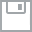
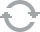
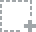
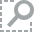
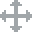
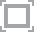
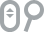
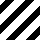
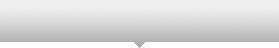
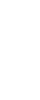
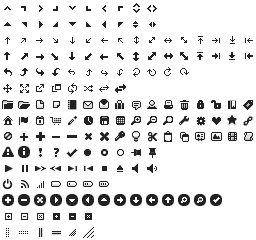
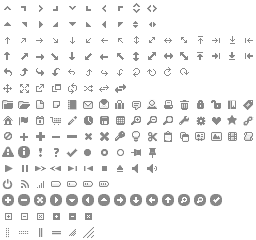
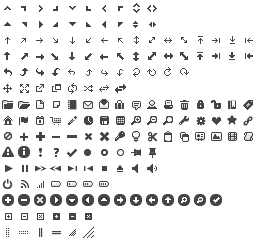
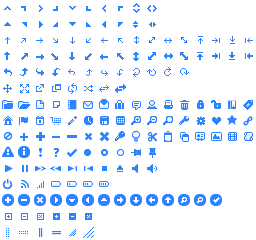
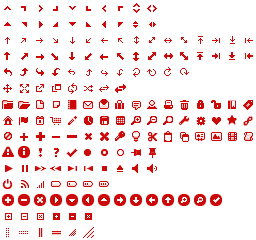
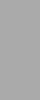
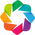
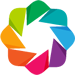

In [250]:
from bokeh.plotting import figure, output_notebook,show,vplot
output_notebook()

In [251]:
import pandas.io.data
import datetime
FB = pd.io.data.get_data_yahoo('FB', 
                                 start=datetime.datetime(2015, 4, 1), 
                                 end=datetime.datetime(2015, 4, 28))


In [252]:
fb.Low

Date
2015-04-01    80.870003
2015-04-02    81.440002
2015-04-06    80.800003
2015-04-07    82.220001
2015-04-08    81.839996
2015-04-09    81.709999
2015-04-10    81.910004
2015-04-13    81.919998
2015-04-14    82.440002
2015-04-15    82.269997
2015-04-16    82.150002
2015-04-17    80.370003
2015-04-20    81.239998
2015-04-21    83.540001
2015-04-22    83.650002
2015-04-23    82.410004
2015-04-24    81.480003
2015-04-27    81.629997
2015-04-28    80.230003
Name: Low, dtype: float64

In [253]:
fb.High

Date
2015-04-01    82.720001
2015-04-02    82.559998
2015-04-06    82.809998
2015-04-07    83.419998
2015-04-08    83.099998
2015-04-09    82.800003
2015-04-10    82.610001
2015-04-13    83.940002
2015-04-14    83.690002
2015-04-15    83.660004
2015-04-16    83.070000
2015-04-17    82.110001
2015-04-20    83.150002
2015-04-21    84.489998
2015-04-22    84.739998
2015-04-23    85.589996
2015-04-24    82.940002
2015-04-27    82.930000
2015-04-28    81.900002
Name: High, dtype: float64

In [254]:
# prepare some data
x = fb.Low
y = fb.High

# create a new plot with a title and axis labels
p = figure(title="Stock High vs. Low", x_axis_label='Low', y_axis_label='High')

# These are glyphs
p.circle(x, y,size=40,alpha=.5,)
p.line(x,x*y.mean()/x.mean())

# show the results
show(p)

At its core, Bokeh is built up with Plots and Glyphs. Plots are created with the figure keyword and then glyphs are visuals that are added to the visualization. The visuals are scalable, interactive and savable. You can even create vectorized colors.

In [255]:
# prepare some data
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (r, g, 150) for r, g in zip(np.floor(50+2*x), np.floor(30+2*y))]

TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(0,100), y_range=(0,100))

# add a circle renderer with vecorized colors and sizes
p.circle(x,y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

# show the results
show(p)

In [256]:
p1 = figure(title="Titanic Ages Dead",x_axis_label = 'Age',y_axis_label = 'Count')
#construct the histogram
hist, edges = np.histogram(data.Age[data.Survived==0].values, density=True, bins=50)
#Construct your x axis
x = np.linspace(data.Age.min(),data.Age.max(),100)
#add the bars, scaling the value to the full count of people
p1.quad(top=hist*len(data.Age), bottom=0, left=edges[:-1], right=edges[1:],line_color='black')

p2 = figure(title="Titanic Ages Survived",x_axis_label = 'Age',y_axis_label = 'Count')

hist, edges = np.histogram(data.Age[data.Survived==1].values, density=True, bins=50)
x = np.linspace(data.Age.min(),data.Age.max(),100)
p2.quad(top=hist*len(data.Age), bottom=0, left=edges[:-1], right=edges[1:],line_color='black')


show(vplot(p1,p2))